In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

![Worldcup](http://img.fifa.com/images/fwc/2018/opengraph/generic.png)


**[FIFA](https://en.wikipedia.org/wiki/FIFA_World_Cup)** 2018 just begun a few days ago. People keep guessing who is going to be the Champion of FIFA World Cup 2018. They even got a cat for this job. However, I just want to know more about the teams. Legend says that Germany is going to win again this time. Rumor says that Belgium is underestimated, and they are going to surprised everybody. I hope my favorite team, Argentina, can have a better grade this time. 

This data includes how many times each team have made it to the final, semifinal, and even win the championship. I'm going to explore this data and try to predict who can make it to the top 16. May the force be with the strongest team.

In [2]:
df = pd.read_csv('../input/World Cup 2018 Dataset.csv')
df = df.dropna(axis='rows',how='all')
df = df.dropna(axis='columns',how='all')

In [3]:
df

,Team,Group,Previous appearances,Previous titles,Previous finals,Previous semifinals,Current FIFA rank,First match against,Match index,history with first opponent W-L,history with first opponent goals,Second match against,Match index.1,history with second opponent W-L,history with second opponent goals,Third match against,Match index.2,history with third opponent W-L,history with third opponent goals
0,Russia,A,10.0,0.0,0.0,1.0,65.0,Saudi Arabia,1.0,-1.0,-2.0,Egypt,17.0,NaN,NaN,Uruguay,33.0,0.0,0.0
1,Saudi Arabia,A,4.0,0.0,0.0,0.0,63.0,Russia,1.0,1.0,2.0,Uruguay,18.0,1.0,1.0,Egypt,34.0,-5.0,-5.0
2,Egypt,A,2.0,0.0,0.0,0.0,31.0,Uruguay,2.0,-1.0,-2.0,Russia,17.0,NaN,NaN,Saudi Arabia,34.0,5.0,5.0
3,Uruguay,A,12.0,2.0,2.0,5.0,21.0,Egypt,2.0,1.0,2.0,Saudi Arabia,18.0,-1.0,-1.0,Russia,33.0,0.0,0.0
4,Porugal,B,6.0,0.0,0.0,2.0,3.0,Spain,3.0,-12.0,-31.0,Morocco,19.0,-1.0,-2.0,Iran,35.0,2.0,5.0
5,Spain,B,14.0,1.0,1.0,2.0,6.0,Portugal,3.0,12.0,31.0,Iran,20.0,NaN,NaN,Morocco,36.0,5.0,7.0
6,Morocco,B,4.0,0.0,0.0,0.0,40.0,Iran,4.0,-2.0,-2.0,Portugal,19.0,1.0,2.0,Spain,36.0,-5.0,-7.0
7,IRAN,B,4.0,0.0,0.0,0.0,32.0,Morocco,4.0,2.0,2.0,Spain,20.0,NaN,NaN,Portugal,35.0,-2.0,-5.0
8,France,C,14.0,1.0,2.0,5.0,9.0,Australia,5.0,1.0,6.0,Peru,21.0,-1.0,-1.0,Denmark,37.0,4.0,9.0
9,Australia,C,4.0,0.0,0.0,0.0,39.0,France,5.0,-1.0,-6.0,Denmark,22.0,-1.0,-3.0,Peru,38.0,NaN,NaN


In [4]:
df = df.fillna(0)

In [5]:
df.columns

Index(['Team', 'Group', 'Previous \nappearances', 'Previous \ntitles',
       'Previous\n finals', 'Previous\n semifinals', 'Current \nFIFA rank',
       'First match \nagainst', 'Match index',
       'history with \nfirst opponent\n W-L',
       'history with\n first opponent\n goals', 'Second match\n against',
       'Match index.1', 'history with\n second opponent\n W-L',
       'history with\n second opponent\n goals', 'Third match\n against',
       'Match index.2', 'history with\n third opponent\n W-L',
       'history with\n third opponent\n goals'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32 entries, 0 to 31
Data columns (total 19 columns):
Team                                    32 non-null object
Group                                   32 non-null object
Previous 
appearances                   32 non-null float64
Previous 
titles                        32 non-null float64
Previous
 finals                        32 non-null float64
Previous
 semifinals                    32 non-null float64
Current 
FIFA rank                      32 non-null float64
First match 
against                    32 non-null object
Match index                             32 non-null float64
history with 
first opponent
 W-L       32 non-null float64
history with
 first opponent
 goals     32 non-null float64
Second match
 against                   32 non-null object
Match index.1                           32 non-null float64
history with
 second opponent
 W-L      32 non-null float64
history with
 second opponent
 goals    32 non-null float64
T

In [7]:
df['score'] = (df['Previous \nappearances'] + 4 * df['Previous\n semifinals'] + 8 * df['Previous\n finals'] + 16 * df['Previous \ntitles'])
df['group_win'] = (df['history with \nfirst opponent\n W-L'] + df['history with\n second opponent\n W-L'] + df['history with\n third opponent\n W-L'])
df['group_goals'] = (df['history with\n first opponent\n goals'] + df['history with\n second opponent\n goals'] + df['history with\n third opponent\n goals'])

<BarContainer object of 32 artists>

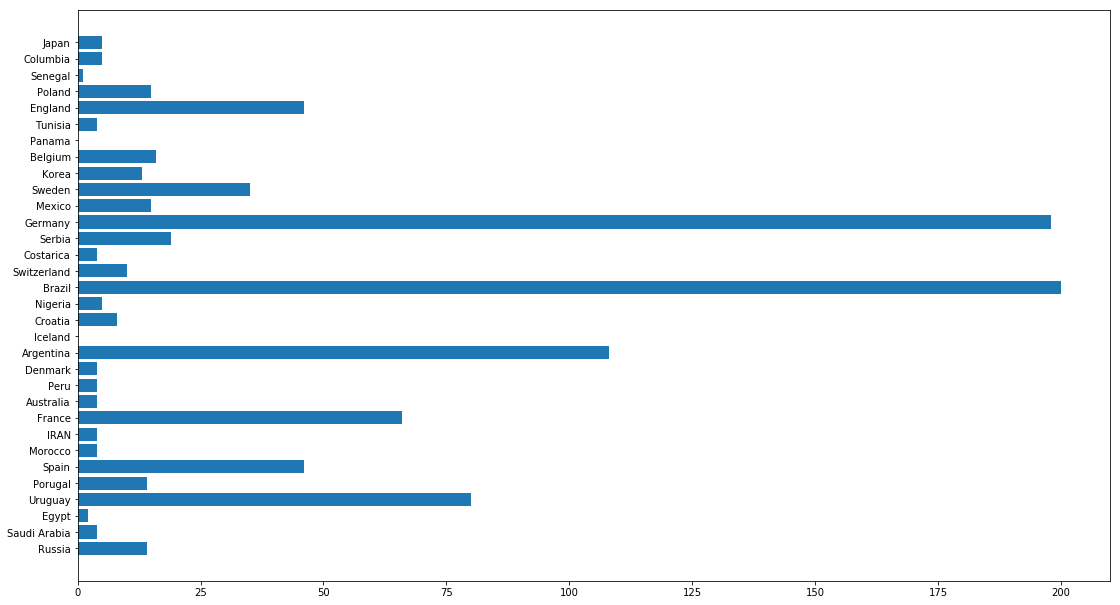

In [8]:
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.barh(df.Team, df.score)

<BarContainer object of 32 artists>

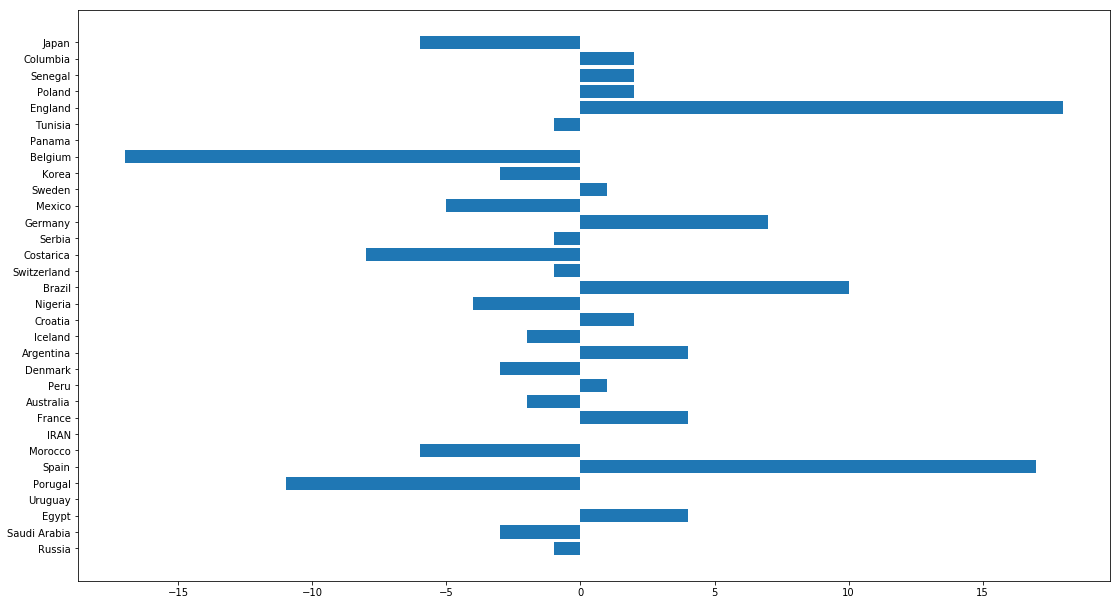

In [9]:
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.barh(df.Team, df.group_win)

Basically, I think the country with bar on the right side can pass the first round

<BarContainer object of 32 artists>

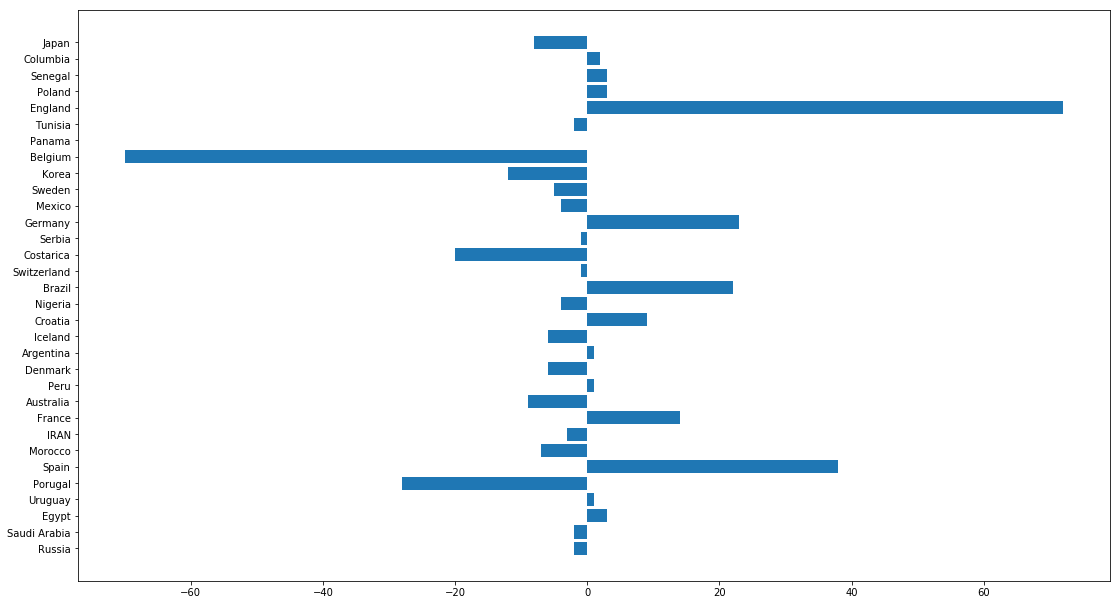

In [10]:
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.barh(df.Team, df.group_goals)

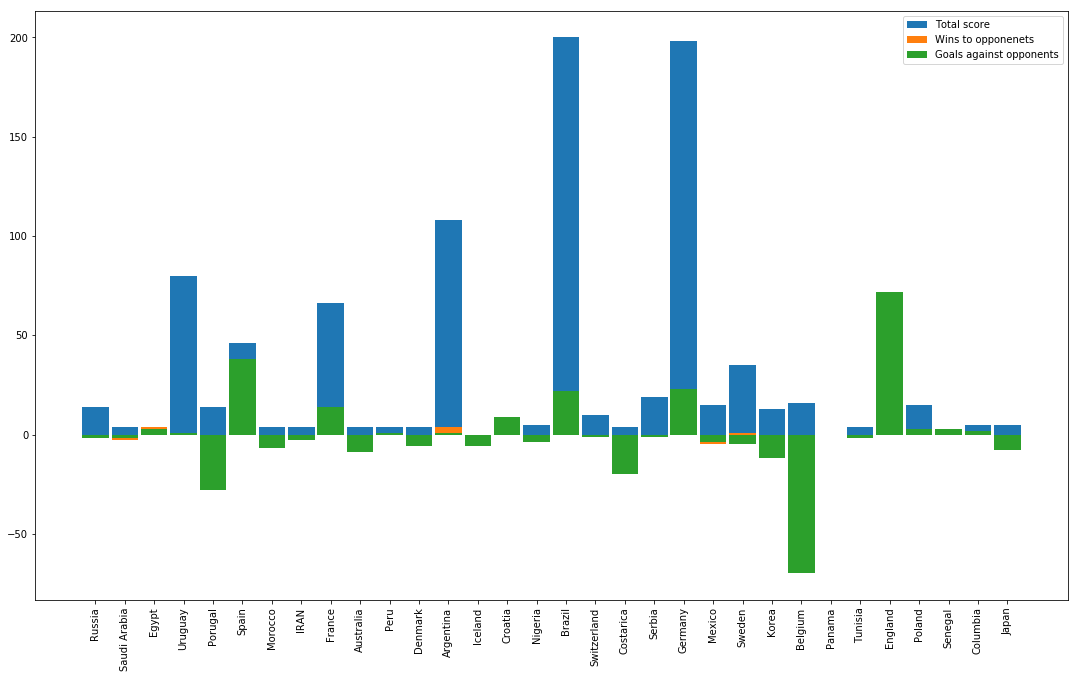

In [11]:
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

barWidth = 0.9

plt.bar(df.Team, df.score, width = barWidth, label='Total score')
plt.bar(df.Team, df.group_win, width = barWidth, label='Wins to opponenets')
plt.bar(df.Team, df.group_goals, width = barWidth, label='Goals against opponents')

plt.legend()
plt.xticks(rotation=90)
plt.subplots_adjust(bottom= 0.2, top = 0.98)
 
plt.show()

In [12]:
df_tree = df.drop(df.index[[13,25]])

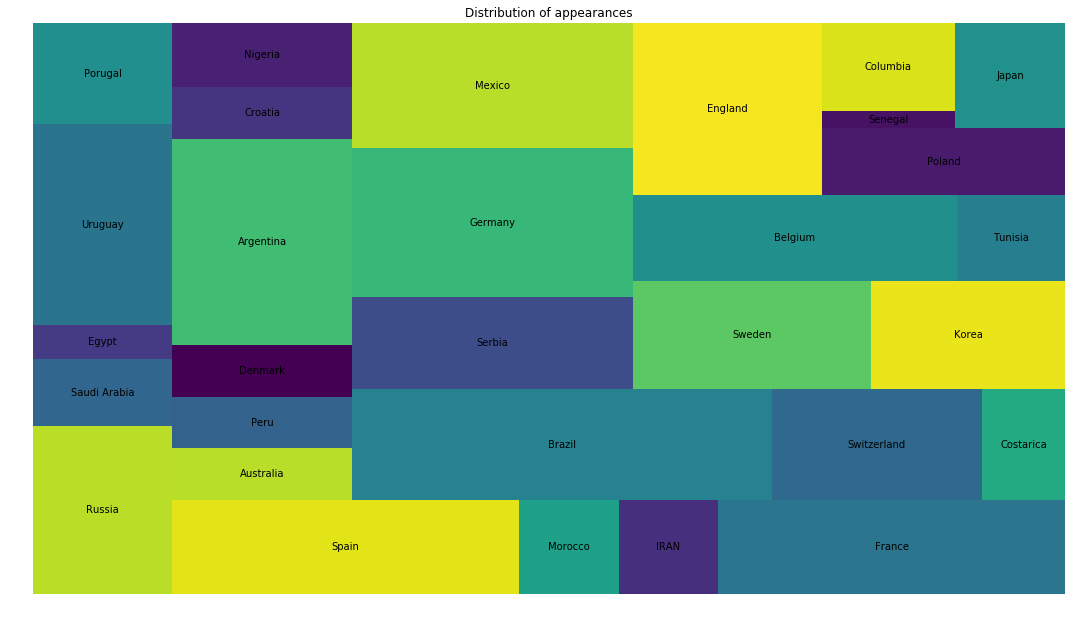

In [13]:
import squarify

df_sub = df_tree.loc[(df_tree!=0).any(axis=1)]

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

squarify.plot(sizes=df_tree['Previous \nappearances'], label=df_tree['Team'])
plt.axis('off')
plt.title('Distribution of appearances')
plt.show()

## Radar chart

As those magazine or report you may have seen, I want to create radar charts to scale each team's strength and make prediction about who will make it to the top 16
Their is five index

* Rank = (70 - df.Current FIFA rank)/7
* Score = (max = 200) /20
* wins(max = 18,min = -17) = (17 + df.group_win)/3.5
* Goals(max = 72,min = -72) = 72 + df.group_goals/14
* Appearance(max = 20) = df.Previous appearances / 2

#Round to integer

In [14]:
df.describe()

,Previous appearances,Previous titles,Previous finals,Previous semifinals,Current FIFA rank,Match index,history with first opponent W-L,history with first opponent goals,Match index.1,history with second opponent W-L,history with second opponent goals,Match index.2,history with third opponent W-L,history with third opponent goals,score,group_win,group_goals
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.00000,32.000000,32.000000,32.000000
mean,7.906250,0.500000,0.843750,1.781250,24.781250,8.500000,0.000000,0.000000,24.500000,0.000000,0.062500,40.500000,0.000000,0.00000,29.781250,0.000000,0.062500
std,5.426098,1.191367,2.017814,3.128788,19.536128,4.683533,3.350493,8.776802,4.683533,2.257604,6.303801,4.683533,4.996773,18.28449,51.021649,6.848593,21.646631
min,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,-12.000000,-31.000000,17.000000,-8.000000,-19.000000,33.000000,-17.000000,-70.00000,0.000000,-17.000000,-70.000000
25%,4.000000,0.000000,0.000000,0.000000,8.750000,4.750000,-1.000000,-2.000000,20.750000,-1.000000,-1.000000,36.750000,-2.000000,-1.50000,4.000000,-3.000000,-6.000000
50%,5.500000,0.000000,0.000000,0.000000,19.500000,8.500000,0.000000,0.000000,24.500000,0.000000,0.000000,40.500000,0.000000,0.00000,9.000000,-0.500000,-1.500000
75%,12.000000,0.000000,0.250000,2.000000,37.500000,12.250000,1.000000,2.000000,28.250000,1.000000,1.000000,44.250000,2.000000,1.50000,23.000000,2.000000,3.000000
max,20.000000,5.000000,8.000000,13.000000,65.000000,16.000000,12.000000,31.000000,32.000000,8.000000,19.000000,48.000000,17.000000,70.00000,200.000000,18.000000,72.000000


In [15]:
df.head(4)

,Team,Group,Previous appearances,Previous titles,Previous finals,Previous semifinals,Current FIFA rank,First match against,Match index,history with first opponent W-L,history with first opponent goals,Second match against,Match index.1,history with second opponent W-L,history with second opponent goals,Third match against,Match index.2,history with third opponent W-L,history with third opponent goals,score,group_win,group_goals
0,Russia,A,10.0,0.0,0.0,1.0,65.0,Saudi Arabia,1.0,-1.0,-2.0,Egypt,17.0,0.0,0.0,Uruguay,33.0,0.0,0.0,14.0,-1.0,-2.0
1,Saudi Arabia,A,4.0,0.0,0.0,0.0,63.0,Russia,1.0,1.0,2.0,Uruguay,18.0,1.0,1.0,Egypt,34.0,-5.0,-5.0,4.0,-3.0,-2.0
2,Egypt,A,2.0,0.0,0.0,0.0,31.0,Uruguay,2.0,-1.0,-2.0,Russia,17.0,0.0,0.0,Saudi Arabia,34.0,5.0,5.0,2.0,4.0,3.0
3,Uruguay,A,12.0,2.0,2.0,5.0,21.0,Egypt,2.0,1.0,2.0,Saudi Arabia,18.0,-1.0,-1.0,Russia,33.0,0.0,0.0,80.0,0.0,1.0


In [16]:
#Rank = (70 - df.Current FIFA rank)/7
#Score = (max = 200) /20
#wins(max = 18,min = -17) = (17 + df.group_win)/3.5
#Goals(max = 72,min = -72) = 72 + df.group_goals/14
#Appearance(max = 20) = df.Previous appearances / 2
#Round to integer
df_radar = pd.DataFrame({
    'group': ['Russia','Saudi Arabia','Egypt','Uruguay'],
    'Rank': [1, 1, 6, 7],
    'Score': [1, 0, 0, 4],
    'Wins': [5, 4, 6, 5],
    'Goals': [5, 5, 5, 5],
    'Appearance': [5, 2, 1, 6]
})

In [17]:
# Refer to https://python-graph-gallery.com/radar-chart/

from math import pi

def make_spider( row, title, color):
 
    # number of variable
    categories=list(df_radar)[1:]
    N = len(categories)
 
    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
 
    # Initialise the spider plot
    ax = plt.subplot(2,2,row+1, polar=True, )
 
    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
 
    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=8)
 
    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([2,4,6,8], ["2","4","6","8"], color="grey", size=7)
    plt.ylim(0,10)
 
    # Ind1
    values=df_radar.loc[row].drop('group').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)
 
    # Add a title
    plt.title(title, size=11, color=color, y=1.1)
 
    # ------- PART 2: Apply to all individuals
    # initialize the figure
    my_dpi=96
    plt.figure(figsize=(1000/my_dpi, 1000/my_dpi), dpi=my_dpi)
 
    # Create a color palette:
    my_palette = plt.cm.get_cmap("Set2", len(df.index))

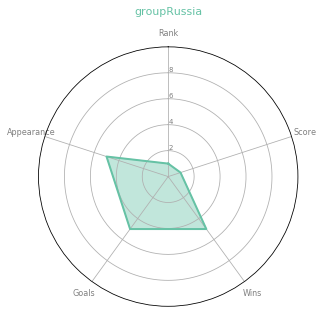

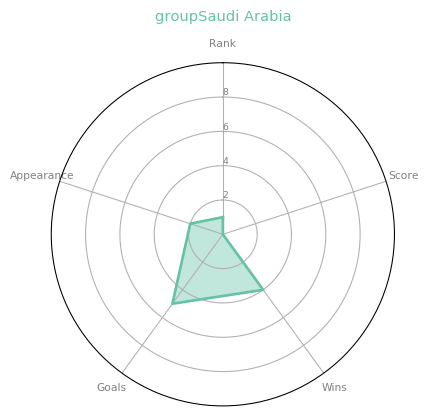

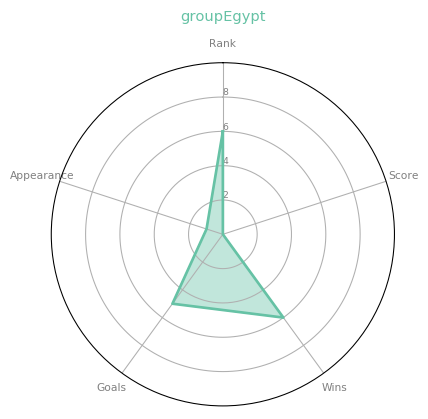

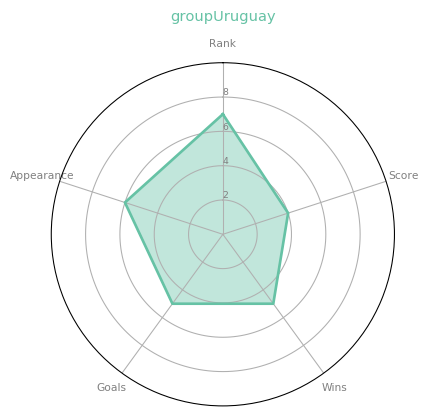

<Figure size 1000x1000 with 0 Axes>

In [18]:
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
my_palette = plt.cm.get_cmap("Set2", len(df.index))
# Loop to plot
for row in range(0, len(df_radar.index)):
    make_spider(row=row, title='group' + df_radar['group'][row], color=my_palette(row))

From the radar chart I made, I think for Group A, Uruguay will make it to the top 16. The other three is pretty equal based on the radar chart.

In [19]:
df[4:8]

,Team,Group,Previous appearances,Previous titles,Previous finals,Previous semifinals,Current FIFA rank,First match against,Match index,history with first opponent W-L,history with first opponent goals,Second match against,Match index.1,history with second opponent W-L,history with second opponent goals,Third match against,Match index.2,history with third opponent W-L,history with third opponent goals,score,group_win,group_goals
4,Porugal,B,6.0,0.0,0.0,2.0,3.0,Spain,3.0,-12.0,-31.0,Morocco,19.0,-1.0,-2.0,Iran,35.0,2.0,5.0,14.0,-11.0,-28.0
5,Spain,B,14.0,1.0,1.0,2.0,6.0,Portugal,3.0,12.0,31.0,Iran,20.0,0.0,0.0,Morocco,36.0,5.0,7.0,46.0,17.0,38.0
6,Morocco,B,4.0,0.0,0.0,0.0,40.0,Iran,4.0,-2.0,-2.0,Portugal,19.0,1.0,2.0,Spain,36.0,-5.0,-7.0,4.0,-6.0,-7.0
7,IRAN,B,4.0,0.0,0.0,0.0,32.0,Morocco,4.0,2.0,2.0,Spain,20.0,0.0,0.0,Portugal,35.0,-2.0,-5.0,4.0,0.0,-3.0


In [20]:
df_radar = pd.DataFrame({
    'group': ['Portugal','Spain','Morocco','Iran'],
    'Rank': [10, 9, 4, 5],
    'Score': [1, 2, 0, 0],
    'Wins': [2, 10, 3, 5],
    'Goals': [3, 8, 5, 5],
    'Appearance': [3, 7, 2, 2]
})

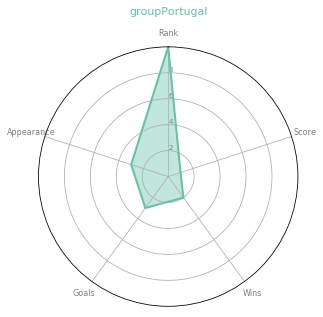

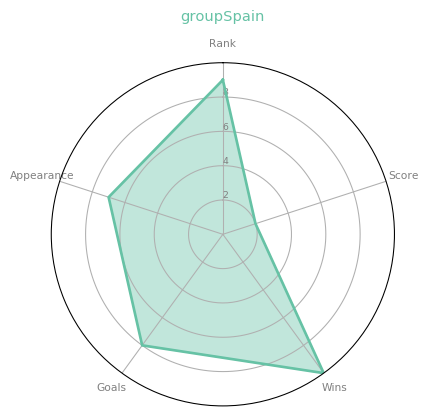

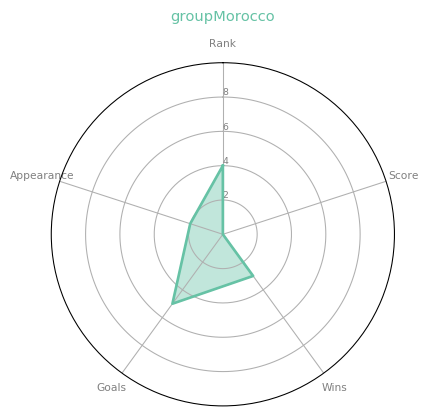

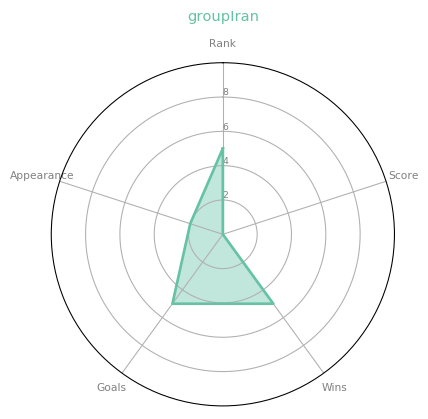

<Figure size 1000x1000 with 0 Axes>

In [21]:
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

for row in range(0, len(df_radar.index)):
    make_spider(row=row, title='group' + df_radar['group'][row], color=my_palette(row))

For group B, Spain and Porugal is definitely gonna make it.

In [22]:
df[8:12]

,Team,Group,Previous appearances,Previous titles,Previous finals,Previous semifinals,Current FIFA rank,First match against,Match index,history with first opponent W-L,history with first opponent goals,Second match against,Match index.1,history with second opponent W-L,history with second opponent goals,Third match against,Match index.2,history with third opponent W-L,history with third opponent goals,score,group_win,group_goals
8,France,C,14.0,1.0,2.0,5.0,9.0,Australia,5.0,1.0,6.0,Peru,21.0,-1.0,-1.0,Denmark,37.0,4.0,9.0,66.0,4.0,14.0
9,Australia,C,4.0,0.0,0.0,0.0,39.0,France,5.0,-1.0,-6.0,Denmark,22.0,-1.0,-3.0,Peru,38.0,0.0,0.0,4.0,-2.0,-9.0
10,Peru,C,4.0,0.0,0.0,0.0,11.0,Denmark,6.0,0.0,0.0,France,21.0,1.0,1.0,Australia,38.0,0.0,0.0,4.0,1.0,1.0
11,Denmark,C,4.0,0.0,0.0,0.0,12.0,Peru,6.0,0.0,0.0,Australia,22.0,1.0,3.0,France,37.0,-4.0,-9.0,4.0,-3.0,-6.0


In [23]:
df_radar = pd.DataFrame({
    'group': ['France','Australia','Peru','Denmark'],
    'Rank': [9, 5, 8, 8],
    'Score': [3, 0, 0, 0],
    'Wins': [6, 4, 5, 5],
    'Goals': [6, 5, 5, 5],
    'Appearance': [7, 2, 2, 2]
})

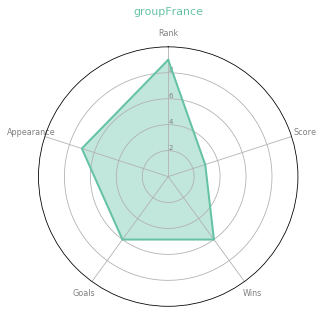

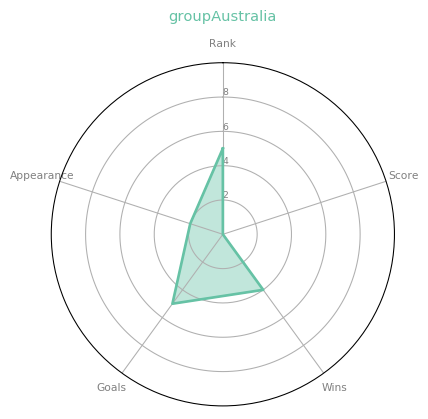

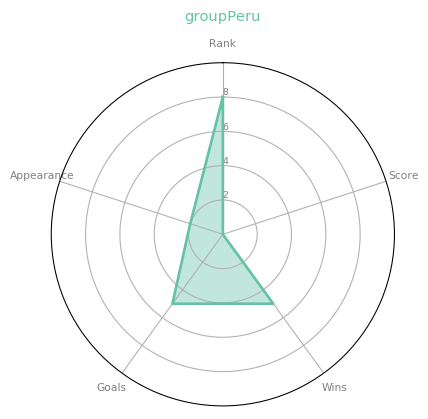

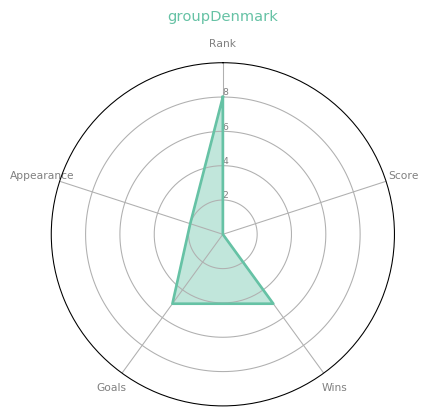

<Figure size 1000x1000 with 0 Axes>

In [24]:
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

for row in range(0, len(df_radar.index)):
    make_spider(row=row, title='group' + df_radar['group'][row], color=my_palette(row))

Group C, France is defenitely gonna make it. Though the rank of Australia isn't as good as the other 3, based on thier performance in thier fist game against France, it's hard to tell which of them will be another team that make it to the top 16.

In [25]:
df[12:16]

,Team,Group,Previous appearances,Previous titles,Previous finals,Previous semifinals,Current FIFA rank,First match against,Match index,history with first opponent W-L,history with first opponent goals,Second match against,Match index.1,history with second opponent W-L,history with second opponent goals,Third match against,Match index.2,history with third opponent W-L,history with third opponent goals,score,group_win,group_goals
12,Argentina,D,16.0,2.0,5.0,5.0,4.0,Iceland,7.0,0.0,0.0,Croatia,23.0,1.0,0.0,Nigeria,39.0,3.0,1.0,108.0,4.0,1.0
13,Iceland,D,0.0,0.0,0.0,0.0,22.0,Argentina,7.0,0.0,0.0,Nigeria,24.0,1.0,3.0,Croatia,40.0,-3.0,-9.0,0.0,-2.0,-6.0
14,Croatia,D,4.0,0.0,0.0,1.0,17.0,Nigeria,8.0,0.0,0.0,Argentina,23.0,-1.0,0.0,Iceland,40.0,3.0,9.0,8.0,2.0,9.0
15,Nigeria,D,5.0,0.0,0.0,0.0,50.0,Croatia,8.0,0.0,0.0,Iceland,24.0,-1.0,-3.0,Argentina,39.0,-3.0,-1.0,5.0,-4.0,-4.0


In [26]:
df_radar = pd.DataFrame({
    'group': ['Argentina','Iceland','Croatia','Nigeria'],
    'Rank': [9, 7, 8, 3],
    'Score': [5, 0, 0, 0],
    'Wins': [6, 4, 5, 4],
    'Goals': [5, 5, 6, 5],
    'Appearance': [8, 0, 2, 3]
})

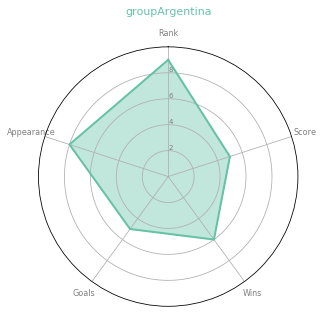

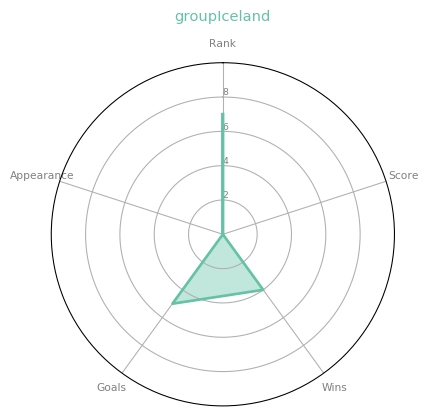

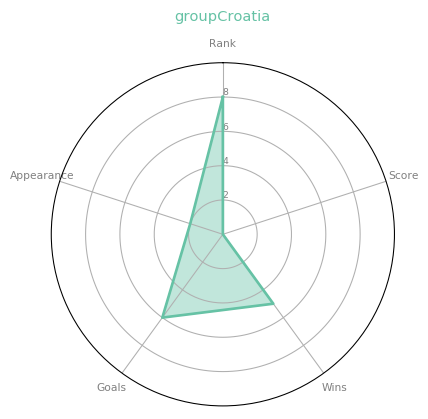

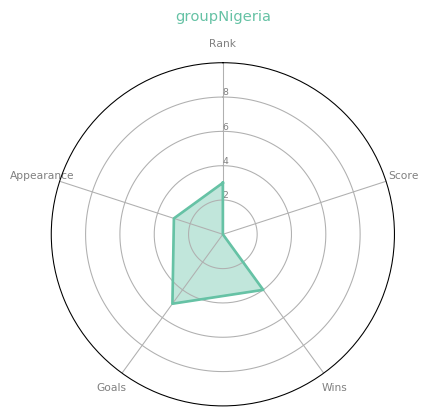

<Figure size 1000x1000 with 0 Axes>

In [27]:
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

for row in range(0, len(df_radar.index)):
    make_spider(row=row, title='group' + df_radar['group'][row], color=my_palette(row))

For group D, Argentian totally can nail it. Croatia probably can pass the first round. However, I personally think Iceland has chance to win few games.

In [28]:
df[16:20]

,Team,Group,Previous appearances,Previous titles,Previous finals,Previous semifinals,Current FIFA rank,First match against,Match index,history with first opponent W-L,history with first opponent goals,Second match against,Match index.1,history with second opponent W-L,history with second opponent goals,Third match against,Match index.2,history with third opponent W-L,history with third opponent goals,score,group_win,group_goals
16,Brazil,E,20.0,5.0,7.0,11.0,2.0,Switzerland,9.0,1.0,2.0,Costarica,25.0,8.0,19.0,Serbia,41.0,1.0,1.0,200.0,10.0,22.0
17,Switzerland,E,10.0,0.0,0.0,0.0,8.0,Brazil,9.0,-1.0,-2.0,Serbia,26.0,0.0,0.0,Costarica,42.0,0.0,1.0,10.0,-1.0,-1.0
18,Costarica,E,4.0,0.0,0.0,0.0,26.0,Serbia,10.0,0.0,0.0,Brazil,25.0,-8.0,-19.0,Switzerland,42.0,0.0,-1.0,4.0,-8.0,-20.0
19,Serbia,E,11.0,0.0,0.0,2.0,37.0,Costarica,10.0,0.0,0.0,Switzerland,26.0,0.0,0.0,Brazil,41.0,-1.0,-1.0,19.0,-1.0,-1.0


In [29]:
df_radar = pd.DataFrame({
    'group': ['Brazil','Switzerland','Costarica','Serbia'],
    'Rank': [10, 9, 6, 5],
    'Score': [10, 1, 0, 1],
    'Wins': [8, 5, 3, 5],
    'Goals': [7, 5, 4, 5],
    'Appearance': [10, 5, 2, 6]
})

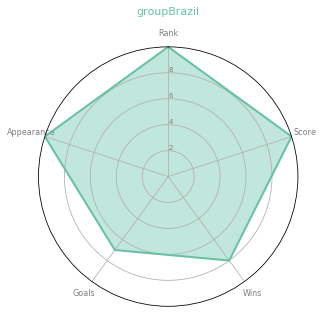

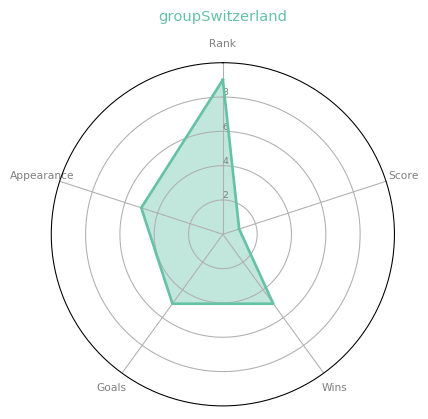

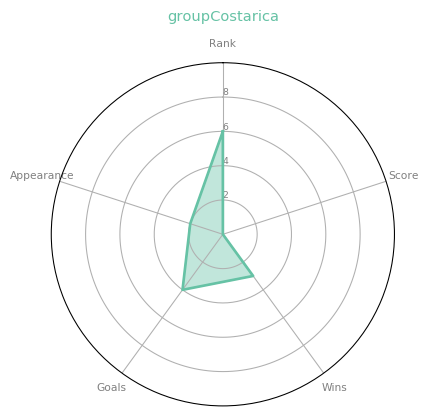

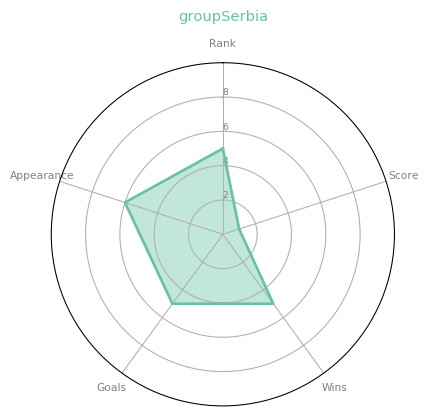

<Figure size 1000x1000 with 0 Axes>

In [30]:
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

for row in range(0, len(df_radar.index)):
    make_spider(row=row, title='group' + df_radar['group'][row], color=my_palette(row))

For group E, Brazil and Switzerland will make it to the top 16.

In [31]:
df[20:24]

,Team,Group,Previous appearances,Previous titles,Previous finals,Previous semifinals,Current FIFA rank,First match against,Match index,history with first opponent W-L,history with first opponent goals,Second match against,Match index.1,history with second opponent W-L,history with second opponent goals,Third match against,Match index.2,history with third opponent W-L,history with third opponent goals,score,group_win,group_goals
20,Germany,F,18.0,4.0,8.0,13.0,1.0,Mexico,11.0,4.0,13.0,Sweden,27.0,2.0,10.0,Korea,43.0,1.0,0.0,198.0,7.0,23.0
21,Mexico,F,15.0,0.0,0.0,0.0,16.0,Germany,11.0,-4.0,-13.0,Korea,28.0,1.0,12.0,Sweden,44.0,-2.0,-3.0,15.0,-5.0,-4.0
22,Sweden,F,11.0,0.0,1.0,4.0,18.0,Korea,12.0,1.0,2.0,Germany,27.0,-2.0,-10.0,Mexico,44.0,2.0,3.0,35.0,1.0,-5.0
23,Korea,F,9.0,0.0,0.0,1.0,59.0,Sweden,12.0,-1.0,-2.0,Mexico,28.0,-1.0,-10.0,Germany,43.0,-1.0,0.0,13.0,-3.0,-12.0


In [32]:
df_radar = pd.DataFrame({
    'group': ['Germany','Mexico','Sweden','Korea'],
    'Rank': [10, 8, 7, 2],
    'Score': [10, 1, 2, 1],
    'Wins': [7, 4, 5, 4],
    'Goals': [7, 5, 5, 4],
    'Appearance': [9, 8, 6, 5]
})

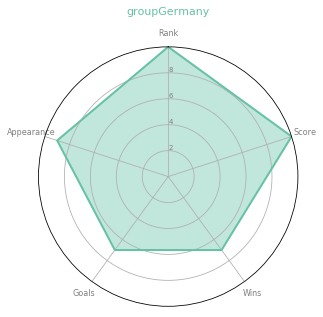

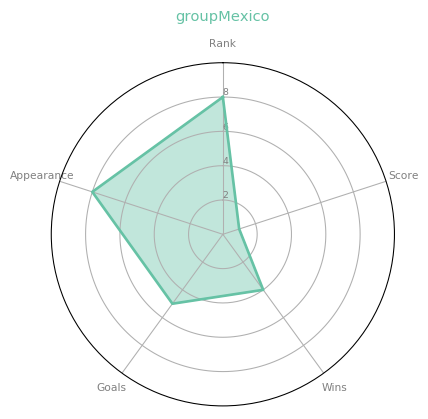

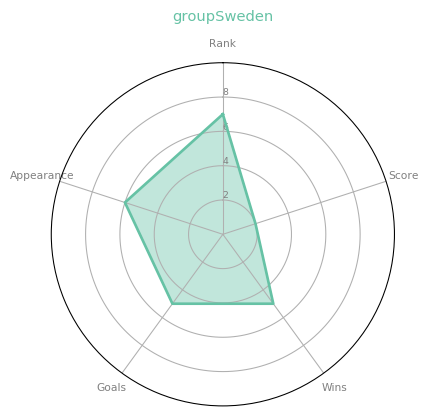

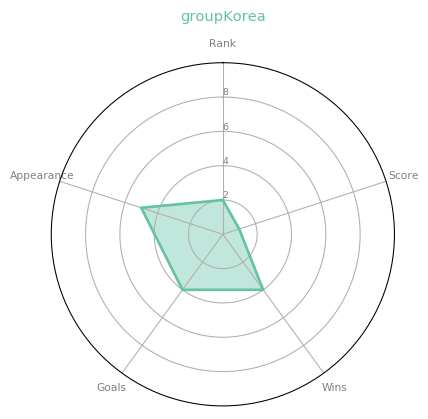

<Figure size 1000x1000 with 0 Axes>

In [33]:
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

for row in range(0, len(df_radar.index)):
    make_spider(row=row, title='group' + df_radar['group'][row], color=my_palette(row))

For group F, I think Germany already got the winning ticket. I think another one that get to the top 16 is Mexico.

In [34]:
df[24:28]

,Team,Group,Previous appearances,Previous titles,Previous finals,Previous semifinals,Current FIFA rank,First match against,Match index,history with first opponent W-L,history with first opponent goals,Second match against,Match index.1,history with second opponent W-L,history with second opponent goals,Third match against,Match index.2,history with third opponent W-L,history with third opponent goals,score,group_win,group_goals
24,Belgium,G,12.0,0.0,0.0,1.0,5.0,Panama,13.0,0.0,0.0,Tunisia,29.0,0.0,0.0,England,45.0,-17.0,-70.0,16.0,-17.0,-70.0
25,Panama,G,0.0,0.0,0.0,0.0,56.0,Belgium,13.0,0.0,0.0,England,30.0,0.0,0.0,Tunisia,46.0,0.0,0.0,0.0,0.0,0.0
26,Tunisia,G,4.0,0.0,0.0,0.0,27.0,England,14.0,-1.0,-2.0,Belgium,29.0,0.0,0.0,Panama,46.0,0.0,0.0,4.0,-1.0,-2.0
27,England,G,14.0,1.0,1.0,2.0,15.0,Tunisia,14.0,1.0,2.0,Panama,30.0,0.0,0.0,Belgium,45.0,17.0,70.0,46.0,18.0,72.0


In [35]:
df_radar = pd.DataFrame({
    'group': ['Belgium','Panama','Tunisia','England'],
    'Rank': [9, 2, 6, 8],
    'Score': [1, 0, 0, 2],
    'Wins': [0, 5, 5, 10],
    'Goals': [0, 5, 5, 10],
    'Appearance': [6, 0, 2, 7]
})

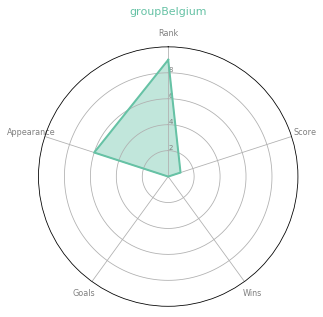

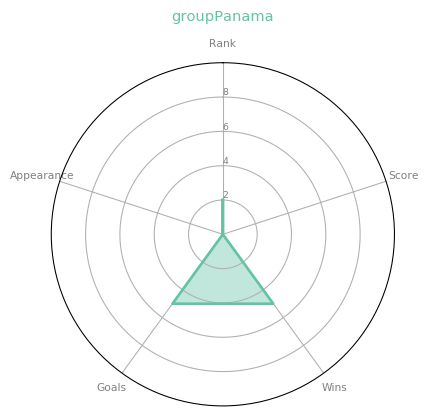

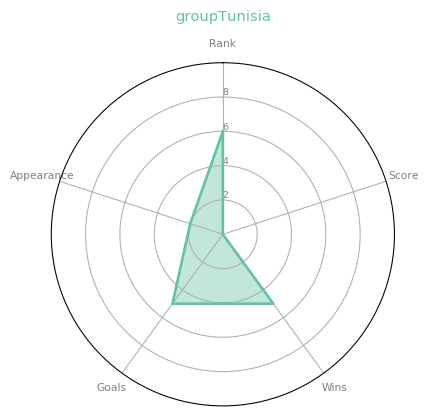

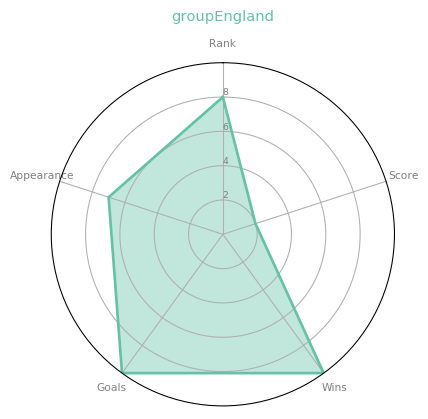

<Figure size 1000x1000 with 0 Axes>

In [36]:
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

for row in range(0, len(df_radar.index)):
    make_spider(row=row, title='group' + df_radar['group'][row], color=my_palette(row))

For group G, England is going to the second round. The radar chart of Belgium is pretty bad most because they lose to England so many time. Since the way to win first round is to have the higher score as possible, Belgium is still probably another team that go to the second round.

In [37]:
df[28:32]

,Team,Group,Previous appearances,Previous titles,Previous finals,Previous semifinals,Current FIFA rank,First match against,Match index,history with first opponent W-L,history with first opponent goals,Second match against,Match index.1,history with second opponent W-L,history with second opponent goals,Third match against,Match index.2,history with third opponent W-L,history with third opponent goals,score,group_win,group_goals
28,Poland,H,7.0,0.0,0.0,2.0,7.0,Senegal,15.0,0.0,0.0,Columbia,31.0,0.0,0.0,Japan,47.0,2.0,3.0,15.0,2.0,3.0
29,Senegal,H,1.0,0.0,0.0,0.0,23.0,Poland,15.0,0.0,0.0,Japan,32.0,2.0,3.0,Columbia,48.0,0.0,0.0,1.0,2.0,3.0
30,Columbia,H,5.0,0.0,0.0,0.0,13.0,Japan,16.0,2.0,2.0,Poland,31.0,0.0,0.0,Senegal,48.0,0.0,0.0,5.0,2.0,2.0
31,Japan,H,5.0,0.0,0.0,0.0,55.0,Columbia,16.0,-2.0,-2.0,Senegal,32.0,-2.0,-3.0,Poland,47.0,-2.0,-3.0,5.0,-6.0,-8.0


In [38]:
df_radar = pd.DataFrame({
    'group': ['Poland','Senegal','Columbia','Japan'],
    'Rank': [9, 7, 8, 2],
    'Score': [1, 0, 0, 0],
    'Wins': [4, 4, 4, 2],
    'Goals': [5, 5, 5, 4],
    'Appearance': [4, 1, 3, 3]
})

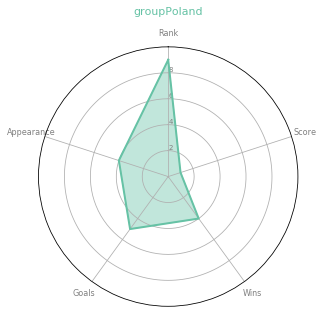

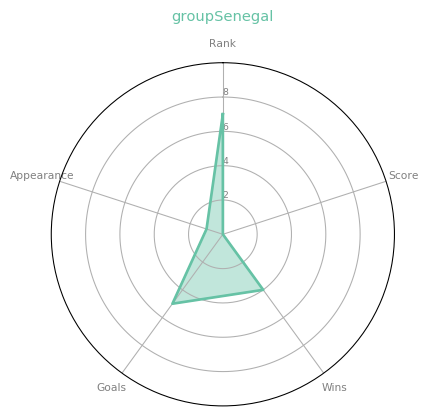

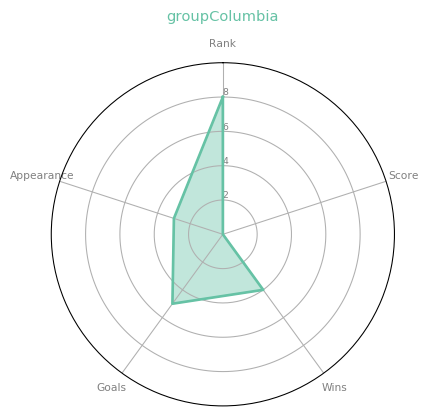

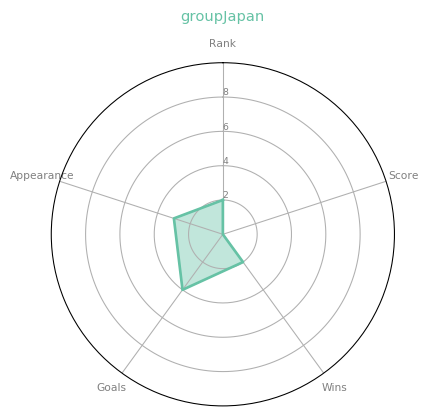

<Figure size 1000x1000 with 0 Axes>

In [39]:
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

for row in range(0, len(df_radar.index)):
    make_spider(row=row, title='group' + df_radar['group'][row], color=my_palette(row))

For group H, I think Poland and Columbia will be the last two that get the tickets to the top 16.

## Now, the top 16 teams are settled. Let me see how many teams I predicted made it.

The list I predicted :

**Uruguay/Spain/Porugal/France/Argentian/Croatia/Brazil/Switzerland/Germany/Mexico/England/Belgium/Poland/Columbia**

**True/True/True/True/True/True/True/True/False/True/True/True/False/True**

### 12 out of 14 are right

The accuracy of my prediction is 85%

While overall accuracy is 75%

### Now, I'll use another scale to make comparison of each match

I'll keep appearance and rank, while use new wins, GS, and GA as those of the last three games.

 ### Matches
 
 * France vs Argentina
 * Uruguay vs Portugal
 * Spain vs Russia
 * Croatia vs Denmark
 * Brazil vs Mexico
 * Belgium vs Japan
 * Switzerland vs Sweden
 * Columbia vs England

In [40]:
match = pd.DataFrame({
    'Team': ['France','Argentina','Uruguay','Portugal','Spain','Russia','Croatia','Denmark','Brazil','Mexico','Belgium','Japan','Switzerland','Sweden','Columbia','England'],
    'Appearance': [7,8,6,3,7,5,2,8,10,8,6,3,5,6,3,7],
    'Rank': [9,9,7,10,9,1,8,8,10,8,9,2,9,7,8,8],
    'Wins': [2,1,3,1,1,2,3,1,2,2,3,1,1,2,2,2],
    'GS': [3,7,5,5,6,8,7,2,5,3,9,4,5,5,5,8],
    'GA': [9,9,10,6,5,6,9,9,9,6,8,6,6,8,7,7]
})

**Radar Chart (overlapped)**

refer to : https://python-graph-gallery.com/391-radar-chart-with-several-individuals/

In [41]:
# Refer to https://python-graph-gallery.com/radar-chart/

from math import pi

def make_spider( row, title, color):
 
    # number of variable
    categories=list(match)[1:]
    N = len(categories)
 
    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
 
    # Initialise the spider plot
    ax = plt.subplot(2,8,row+1, polar=True, )
 
    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
 
    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=8)
 
    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([2,4,6,8], ["2","4","6","8"], color="grey", size=7)
    plt.ylim(0,10)
 
    # Ind1
    values=match.loc[row].drop('Team').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)
 
    # Add a title
    plt.title(title, size=11, color=color, y=1.4)
 
    # ------- PART 2: Apply to all individuals
    # initialize the figure
    my_dpi=96
    plt.figure(figsize=(1000/my_dpi, 1000/my_dpi), dpi=my_dpi)
 
    # Create a color palette:
    my_palette = plt.cm.get_cmap("Set2", len(df.index))

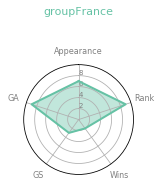

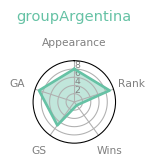

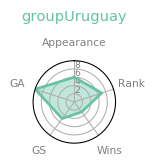

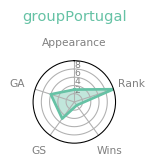

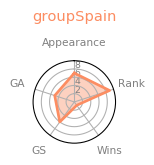

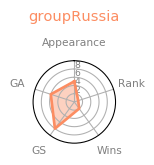

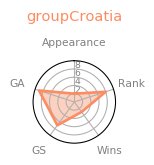

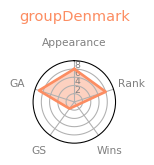

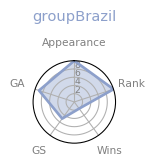

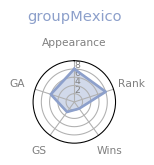

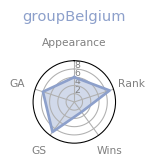

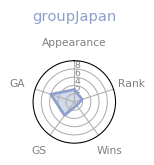

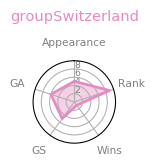

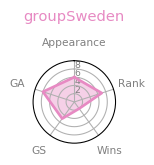

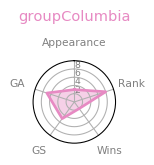

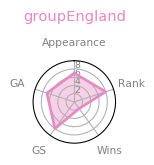

<Figure size 1000x1000 with 0 Axes>

In [42]:
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

for row in range(0, len(match.index)):
    make_spider(row=row, title='group' + match['Team'][row], color=my_palette(row))

**In my opinion, I think these teams will win the matches :**

* Argentina X
* Uruguay V
* Spain X
* Croatia V
* Brazil V
* Belgium V
* Sweden V
* England V

### OK, so now all top 8s are settled. I predicted 6 out of 8 right. I need to be honest, Russia did surprise me with their performance.

In [43]:
match = pd.DataFrame({
    'Team': ['France','Uruguay','Russia','Croatia','Brazil','Belgium','Sweden','England'],
    'Appearance': [7,6,5,2,10,5,6,7],
    'Rank': [9,7,1,8,10,9,7,8],
    'Wins': [2,3,2,3,2,1,2,2],
    'GS': [3,5,8,7,5,5,5,8],
    'GA': [9,10,6,9,9,6,8,7]
})

In [44]:
# Refer to https://python-graph-gallery.com/radar-chart/

from math import pi

def make_spider( row, title, color):
 
    # number of variable
    categories=list(match)[1:]
    N = len(categories)
 
    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
 
    # Initialise the spider plot
    ax = plt.subplot(2,4,row+1, polar=True, )
 
    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
 
    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=8)
 
    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([2,4,6,8], ["2","4","6","8"], color="grey", size=7)
    plt.ylim(0,10)
 
    # Ind1
    values=match.loc[row].drop('Team').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)
 
    # Add a title
    plt.title(title, size=11, color=color, y=1.4)
 
    # ------- PART 2: Apply to all individuals
    # initialize the figure
    my_dpi=96
    plt.figure(figsize=(1000/my_dpi, 1000/my_dpi), dpi=my_dpi)
 
    # Create a color palette:
    my_palette = plt.cm.get_cmap("Set2", len(df.index))

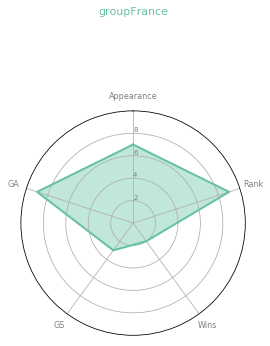

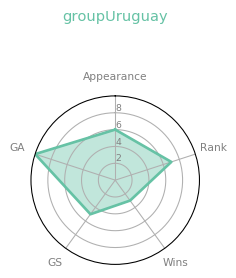

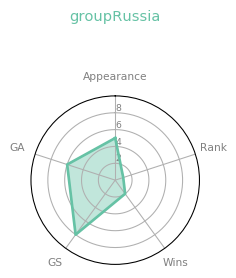

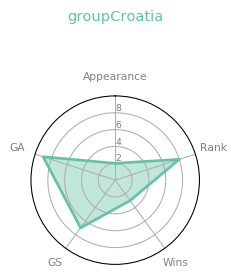

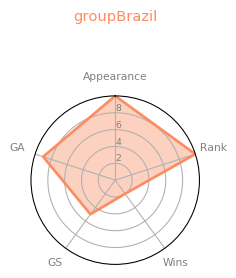

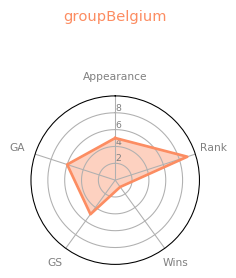

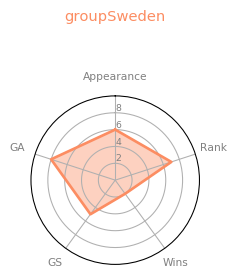

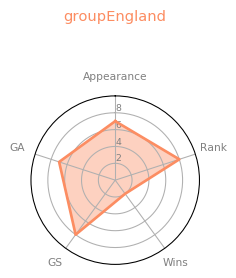

<Figure size 1000x1000 with 0 Axes>

In [45]:
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

for row in range(0, len(match.index)):
    make_spider(row=row, title='group' + match['Team'][row], color=my_palette(row))

## Upvote if you find it interesting. Let's see if I predict it right.